In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

## util

In [9]:
## root finding with bisection method
def bisection(f, a, b, tol, maxiter):
    c_values = np.array([])
    error_values = np.array([])
    if f(a) * f(b) > 0:
        print("f(a) and f(b) must have opposite signs")
        return None
    for i in range(maxiter):
        c = (a + b) / 2
        c_values = np.append(c_values, c)
        error_values = np.append(error_values, f(c))
        if f(c) == 0 or (b - a) / 2 < tol:
            plot_bisection(c_values, error_values)
            return c, c_values, error_values
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    plot_bisection(c_values, error_values)
    return c, c_values, error_values

def plot_bisection(c_values, error_values):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(c_values, label='c values')
    plt.xlabel('Iteration')
    plt.ylabel('c value')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(error_values, label='Error values')
    plt.xlabel('Iteration')
    plt.ylabel('Error value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
# error_func = lambda x: F_steel(x, As, d, Es, factor=10e-3) - F_concrete(x, fck, b, factor=10e-3)
# x, c_values, error_values = bisection(error_func, 0.617*d, 0.79*d, 1e-6, 100)

## concrete force
def F_concrete(x, fck, b, factor=1):
    return 0.567 * fck * b * 0.8 * x * factor

## steel stress and strain
def Steel_strain(x, d):
    return 0.0035 * (d - x) / x

def Steel_stress(x, Es, d, factor=1):
    return Es * Steel_strain(x, d) * factor

def F_steel(x, As, d, Es, factor=1):
    return As * Steel_stress(x, Es, d, factor) * 0.87

## constant

In [8]:
fck = 30
fyk = 500
As = 6430
b = 400
d = 650
e_c = 0.0035
Es = 2e5

x = 0.6353151 * d
concrete_force = F_concrete(x, fck, b, factor=10e-3)
print(f'Concrete force: {concrete_force:.2f} kN')

strain = Steel_strain(x, d)
steel_stress = Steel_stress(x, Es, d,factor=10e-3) 
print("Steel stress: ", steel_stress, "kN/mm2")

steel_force = F_steel(x, As, d, Es, factor=10e-3)
print(f'Steel force: {steel_force:.2f} kN')
print(f'{'-'*100} \n')

print(f'💻 ERROR: {(steel_force - concrete_force):.2f} kN')

Concrete force: 22477.96 kN
Steel stress:  4.018154613356428 kN/mm2
Steel force: 22477.96 kN
---------------------------------------------------------------------------------------------------- 

💻 ERROR: 0.00 kN


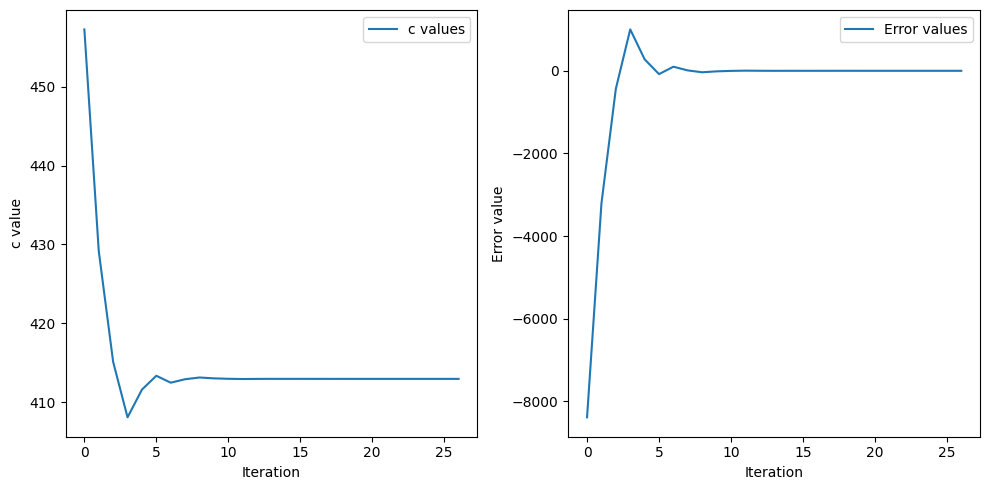

1002.0319181184677


In [11]:
error_func = lambda x: F_steel(x, As, d, Es, factor=10e-3) - F_concrete(x, fck, b, factor=10e-3)
x, c_values, error_values = bisection(error_func, 0.617*d, 0.79*d, 1e-6, 100)
print(np.max(error_values))